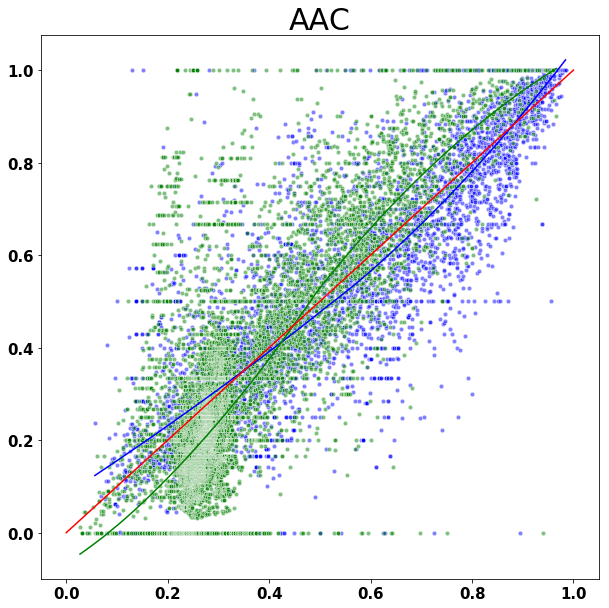

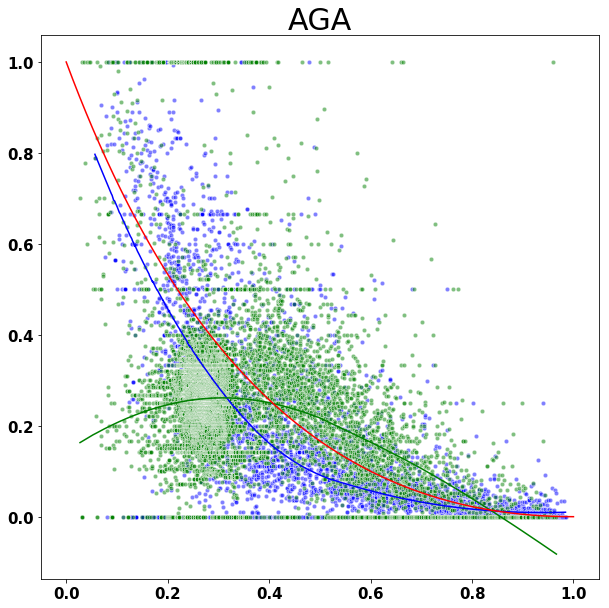

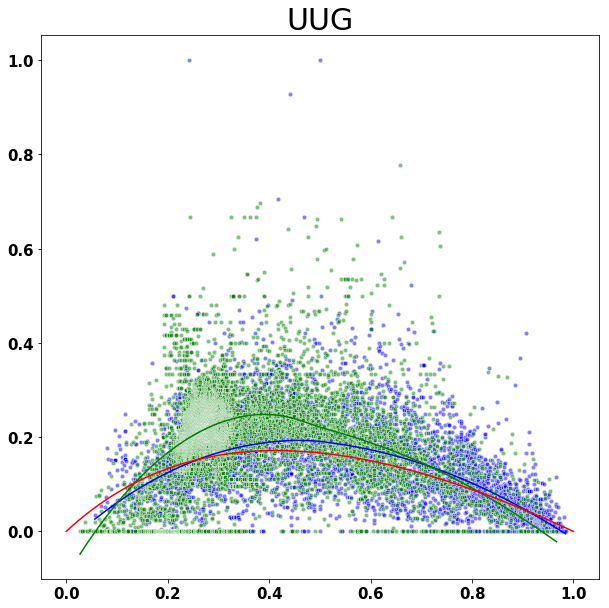

<Figure size 720x720 with 0 Axes>

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from loess_1d import loess_1d
from model_definer import y_model
codons = ["AAC", "AGA", "UUG"]
for codon in codons:
    proc_df = pd.read_csv("df_proc_relfreq.csv", sep=",", index_col=0)
    plant_df = pd.read_csv("df_plant_relfreq.csv", sep=",", index_col=0)
    proc_y = np.array(proc_df[str(codon)])
    proc_x = np.array(proc_df["gc_fraction"])
    plant_y = np.array(plant_df[str(codon)])
    plant_x = np.array(plant_df["gc_fraction"])
    width, height = 10, 10
    mpl.rcParams['figure.figsize'] = [width, height]
    sns.scatterplot(proc_x, proc_y, data=proc_df, s=20, alpha=0.5, color="blue")
    sns.scatterplot(plant_x, plant_y, data=plant_df, s=20, alpha=0.5, color="green")
    xout, yout, wout = loess_1d(proc_x, proc_y, frac=1, degree=2)
    sns.lineplot(xout, yout, color="blue")
    xout, yout, wout = loess_1d(plant_x, plant_y, frac=1, degree=2)
    sns.lineplot(xout, yout, color="green")
    x_mod = np.linspace(start = 0, stop = 1, num = 1000)
    y_mod = y_model(codon)
    sns.lineplot(x_mod, y_mod, linestyle = '--', color = 'red')
    plt.xticks(size=15, weight='bold')
    plt.yticks(size=15, weight='bold')
    plt.title(codon, size=30)
    plt.figure()

